## 머신러닝
# 선형회귀 (Linear Regression)

In [1]:
import numpy as np
import matplotlib.pyplot as plt

### 아이리스 데이터 불러오기

In [3]:
from sklearn.datasets import load_iris
iris = load_iris()

In [4]:
iris.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [5]:
iris.data

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [7]:
iris.data.shape

(150, 4)

In [9]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [52]:
display(iris.data.shape, iris.target, iris.target_names, iris.feature_names)

(150, 4)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

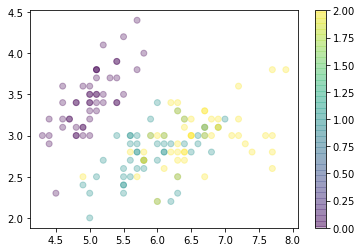

In [3]:
plt.scatter(iris.data[:,0], iris.data[:,1], c=iris.target, alpha=0.3)
plt.colorbar()

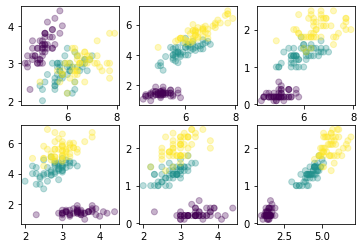

In [62]:
plt.subplot(2,3,1)
plt.scatter(iris.data[:,0], iris.data[:,1], c=iris.target, alpha=0.3)
plt.subplot(2,3,2)
plt.scatter(iris.data[:,0], iris.data[:,2], c=iris.target, alpha=0.3)
plt.subplot(2,3,3)
plt.scatter(iris.data[:,0], iris.data[:,3], c=iris.target, alpha=0.3)
plt.subplot(2,3,4)
plt.scatter(iris.data[:,1], iris.data[:,2], c=iris.target, alpha=0.3)
plt.subplot(2,3,5)
plt.scatter(iris.data[:,1], iris.data[:,3], c=iris.target, alpha=0.3)
plt.subplot(2,3,6)
plt.scatter(iris.data[:,2], iris.data[:,3], c=iris.target, alpha=0.3)

### 선형회귀 적용
- X(입력값), y(목표값) 설정
- LinearRegression 모델 생성
- fit()
- predict()

In [16]:
X = iris.data[:, 2] # 입력 데이터
y = iris.data[:, 3] # 목표값

In [17]:
## X(입력값)은 항상 2차원 행렬이어야 한다!
X = iris.data[:, [2]] # X = iris.data[:, 2].reshape(-1,1) 로 해도 됨

In [10]:
iris.data[:, 2]

array([1.4, 1.4, 1.3, 1.5, 1.4, 1.7, 1.4, 1.5, 1.4, 1.5, 1.5, 1.6, 1.4,
       1.1, 1.2, 1.5, 1.3, 1.4, 1.7, 1.5, 1.7, 1.5, 1. , 1.7, 1.9, 1.6,
       1.6, 1.5, 1.4, 1.6, 1.6, 1.5, 1.5, 1.4, 1.5, 1.2, 1.3, 1.4, 1.3,
       1.5, 1.3, 1.3, 1.3, 1.6, 1.9, 1.4, 1.6, 1.4, 1.5, 1.4, 4.7, 4.5,
       4.9, 4. , 4.6, 4.5, 4.7, 3.3, 4.6, 3.9, 3.5, 4.2, 4. , 4.7, 3.6,
       4.4, 4.5, 4.1, 4.5, 3.9, 4.8, 4. , 4.9, 4.7, 4.3, 4.4, 4.8, 5. ,
       4.5, 3.5, 3.8, 3.7, 3.9, 5.1, 4.5, 4.5, 4.7, 4.4, 4.1, 4. , 4.4,
       4.6, 4. , 3.3, 4.2, 4.2, 4.2, 4.3, 3. , 4.1, 6. , 5.1, 5.9, 5.6,
       5.8, 6.6, 4.5, 6.3, 5.8, 6.1, 5.1, 5.3, 5.5, 5. , 5.1, 5.3, 5.5,
       6.7, 6.9, 5. , 5.7, 4.9, 6.7, 4.9, 5.7, 6. , 4.8, 4.9, 5.6, 5.8,
       6.1, 6.4, 5.6, 5.1, 5.6, 6.1, 5.6, 5.5, 4.8, 5.4, 5.6, 5.1, 5.1,
       5.9, 5.7, 5.2, 5. , 5.2, 5.4, 5.1])

In [14]:
iris.data[:, [2]]

array([[1.4],
       [1.4],
       [1.3],
       [1.5],
       [1.4],
       [1.7],
       [1.4],
       [1.5],
       [1.4],
       [1.5],
       [1.5],
       [1.6],
       [1.4],
       [1.1],
       [1.2],
       [1.5],
       [1.3],
       [1.4],
       [1.7],
       [1.5],
       [1.7],
       [1.5],
       [1. ],
       [1.7],
       [1.9],
       [1.6],
       [1.6],
       [1.5],
       [1.4],
       [1.6],
       [1.6],
       [1.5],
       [1.5],
       [1.4],
       [1.5],
       [1.2],
       [1.3],
       [1.4],
       [1.3],
       [1.5],
       [1.3],
       [1.3],
       [1.3],
       [1.6],
       [1.9],
       [1.4],
       [1.6],
       [1.4],
       [1.5],
       [1.4],
       [4.7],
       [4.5],
       [4.9],
       [4. ],
       [4.6],
       [4.5],
       [4.7],
       [3.3],
       [4.6],
       [3.9],
       [3.5],
       [4.2],
       [4. ],
       [4.7],
       [3.6],
       [4.4],
       [4.5],
       [4.1],
       [4.5],
       [3.9],
       [4.8],
      

In [18]:
X.shape, y.shape

((150, 1), (150,))

In [21]:
from sklearn.linear_model import LinearRegression

In [22]:
model = LinearRegression()
model.fit(X, y)
y_pred = model.predict(X)
print(y_pred)

[0.21898206 0.21898206 0.17740652 0.2605576  0.21898206 0.34370869
 0.21898206 0.2605576  0.21898206 0.2605576  0.2605576  0.30213314
 0.21898206 0.09425544 0.13583098 0.2605576  0.17740652 0.21898206
 0.34370869 0.2605576  0.34370869 0.2605576  0.0526799  0.34370869
 0.42685977 0.30213314 0.30213314 0.2605576  0.21898206 0.30213314
 0.30213314 0.2605576  0.2605576  0.21898206 0.2605576  0.13583098
 0.17740652 0.21898206 0.17740652 0.2605576  0.17740652 0.17740652
 0.17740652 0.30213314 0.42685977 0.21898206 0.30213314 0.21898206
 0.2605576  0.21898206 1.59097494 1.50782385 1.67412602 1.29994614
 1.54939939 1.50782385 1.59097494 1.00891735 1.54939939 1.2583706
 1.09206844 1.38309723 1.29994614 1.59097494 1.13364398 1.46624831
 1.50782385 1.34152169 1.50782385 1.2583706  1.63255048 1.29994614
 1.67412602 1.59097494 1.42467277 1.46624831 1.63255048 1.71570156
 1.50782385 1.09206844 1.21679506 1.17521952 1.2583706  1.7572771
 1.50782385 1.50782385 1.59097494 1.46624831 1.34152169 1.299946

In [25]:
model.predict([[0],[10],[100]])

array([-0.36307552,  3.79447864, 41.21246611])

```
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import load_iris
iris = load_iris()

X = iris.data[:, [2]]
y = iris.data[:, 3]

from sklearn.linear_model import LinearRegression
model = LinearRegression()

model.fit(X, y)

y_pred = model.predict([[1]])
print(y_pred)
```

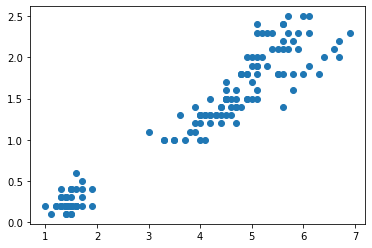

In [15]:
plt.scatter(X[:,0], y)

(0.705, 7.195, -0.06996795279057898, 2.628284699336572)

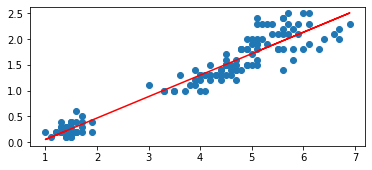

In [17]:
plt.scatter(X[:,0], y)
plt.plot(X[:,0], y_pred, 'r')
plt.axis('scaled')

### 선형회귀 결과분석
$$ \hat{y} = w_1 x_1 + w_2 x_2 + w_3 x_3 + b $$

- 가중치(기울기)와 절편값

In [8]:
model.coef_ # w

array([0.41575542])

In [9]:
model.intercept_ # b

-0.3630755213190291

- 새로운 값으로 예측

In [10]:
model.predict([[1]])

array([0.0526799])

In [12]:
model.predict([[7]])

array([2.54721239])

In [13]:
model.predict([[1], [7]])

array([0.0526799 , 2.54721239])

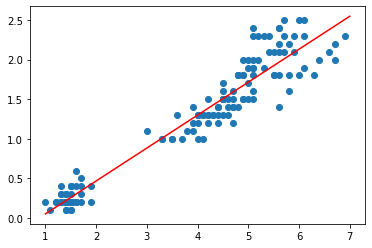

In [16]:
xs = np.array([1, 7])
ys = model.coef_[0]*xs + model.intercept_
plt.scatter(X[:,0], y)
plt.plot(xs, ys, 'r')

In [17]:
model.score(X, y)

0.9271098389904927

In [20]:
y_mean = y.mean()
1 - ((y-y_pred)**2).sum()/((y-y_mean)**2).sum() # 결정계수 (coefficient of determination)

0.9271098389904927

### 입력 속성이 여러개인 선형회귀
- 결과는 다차원공간에서의 평면이 된다

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import load_iris
iris = load_iris()

In [26]:
X = iris.data[:, :3]
y = iris.data[:, 3]
X.shape, y.shape

((150, 3), (150,))

In [27]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X, y)

LinearRegression()

In [28]:
w = model.coef_
b = model.intercept_
display(w,b)

array([-0.20726607,  0.22282854,  0.52408311])

-0.24030738911226002

In [22]:
model = LinearRegression()
model.fit(X, y)
y_pred = model.predict(X)
y_pred

array([0.2162519 , 0.14629084, 0.17990145, 0.28316183, 0.25926136,
       0.40042843, 0.29760208, 0.26710396, 0.22764102, 0.22098201,
       0.2510461 , 0.36096549, 0.16701745, 0.11342555, 0.0777633 ,
       0.34484626, 0.19079518, 0.2162519 , 0.31596575, 0.33550877,
       0.28901416, 0.31322592, 0.13253454, 0.32891112, 0.51819042,
       0.23038086, 0.31951227, 0.2479336 , 0.17324244, 0.33712639,
       0.29411693, 0.18419753, 0.38163073, 0.28932545, 0.22098201,
       0.06531332, 0.08093716, 0.27998797, 0.19751557, 0.24637736,
       0.18457019, 0.02080898, 0.24208128, 0.34179513, 0.54514202,
       0.16701745, 0.38791709, 0.25303637, 0.2717727 , 0.1924128 ,
       1.48507207, 1.5046151 , 1.58833245, 1.22856732, 1.44716538,
       1.56056993, 1.65244118, 1.00835163, 1.44872163, 1.32747024,
       1.00331023, 1.40645749, 1.10265142, 1.60476298, 1.13190459,
       1.36774411, 1.62586225, 1.30792722, 1.32323977, 1.19999811,
       1.76547307, 1.21562194, 1.57899497, 1.58248012, 1.33294

In [23]:
model.score(X, y)

0.9378502736046809

In [24]:
model.coef_ # [w1, w2, w3]

array([-0.20726607,  0.22282854,  0.52408311])

In [25]:
model.intercept_ # b

-0.24030738911226002